In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/ML/data/Dataset/")

In [4]:
df1 =pd.read_csv("train.csv")
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Original columns before conversion
original_columns = set(df.columns)

# Identify and handle non-numeric columns
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Converting non-numeric column to numeric: {col}")
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns that couldn't be converted (if needed)
df = df.dropna(axis=1, how='any')  # Drop columns with NaN values, if necessary

# Columns after conversion
new_columns = set(df.columns)

# Columns added after conversion
added_columns = new_columns - original_columns
print("Columns added after conversion:")
print(added_columns)

# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identify top correlated features with SalePrice
corr_with_saleprice = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print("\nTop correlated features with SalePrice:")
print(corr_with_saleprice)

# You can now analyze and select features based on their correlation with SalePrice and their potential impact on model performance.


Converting non-numeric column to numeric: MSZoning
Converting non-numeric column to numeric: Street
Converting non-numeric column to numeric: Alley
Converting non-numeric column to numeric: LotShape
Converting non-numeric column to numeric: LandContour
Converting non-numeric column to numeric: Utilities
Converting non-numeric column to numeric: LotConfig
Converting non-numeric column to numeric: LandSlope
Converting non-numeric column to numeric: Neighborhood
Converting non-numeric column to numeric: Condition1
Converting non-numeric column to numeric: Condition2
Converting non-numeric column to numeric: BldgType
Converting non-numeric column to numeric: HouseStyle
Converting non-numeric column to numeric: RoofStyle
Converting non-numeric column to numeric: RoofMatl
Converting non-numeric column to numeric: Exterior1st
Converting non-numeric column to numeric: Exterior2nd
Converting non-numeric column to numeric: MasVnrType
Converting non-numeric column to numeric: ExterQual
Converting

In [6]:
df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [7]:
column_names = df.columns
print(column_names)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('train.csv')

# Specify the columns you want to keep (example)
selected_features = ['LotArea', 'OverallQual', 'FullBath', 'HalfBath', 'YrSold','OverallQual','SalePrice','GrLivArea']

# Create a new DataFrame with only the selected columns
df = df[selected_features]

# Handle missing values (example: impute missing numeric values with median)
df = df.fillna(df.median())

# Separate features (X) and target variable (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (example: using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can proceed with model training (using Ridge, Lasso, Elastic Net, etc.)


In [50]:
df.isnull().sum()
df.duplicated().sum()
df.describe()

,LotArea,OverallQual,FullBath,HalfBath,YrSold,OverallQual,SalePrice,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1.565068,0.382877,2007.815753,6.099315,180921.195890,1515.463699
std,9981.264932,1.382997,0.550916,0.502885,1.328095,1.382997,79442.502883,525.480383
min,1300.000000,1.000000,0.000000,0.000000,2006.000000,1.000000,34900.000000,334.000000
25%,7553.500000,5.000000,1.000000,0.000000,2007.000000,5.000000,129975.000000,1129.500000
50%,9478.500000,6.000000,2.000000,0.000000,2008.000000,6.000000,163000.000000,1464.000000
75%,11601.500000,7.000000,2.000000,1.000000,2009.000000,7.000000,214000.000000,1776.750000
max,215245.000000,10.000000,3.000000,2.000000,2010.000000,10.000000,755000.000000,5642.000000


In [51]:
df = df.fillna(df.mean())

# Separate features (X) and target variable (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']



In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
my_model = LinearRegression()


In [54]:
my_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = my_model.predict(X_test)

In [56]:
print('Coefficients:', my_model.coef_)
print('Intercept:', my_model.intercept_)

Coefficients: [ 8.70458479e-01  1.62443288e+04  5.46480000e+03 -9.61557829e+02
  6.95642625e+02  1.62443288e+04  4.53548543e+01]
Intercept: -1500995.4326069807


<ipython-input-57-5d9e2f82095c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TotalBath'] = new_df['FullBath'] + new_df['HalfBath']


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best Elastic Net Regression:
R² score (Best Elastic Net): 0.7685
Mean Absolute Error (MAE) (Best Elastic Net): 0.1349
Mean Squared Error (MSE) (Best Elastic Net): 0.0313


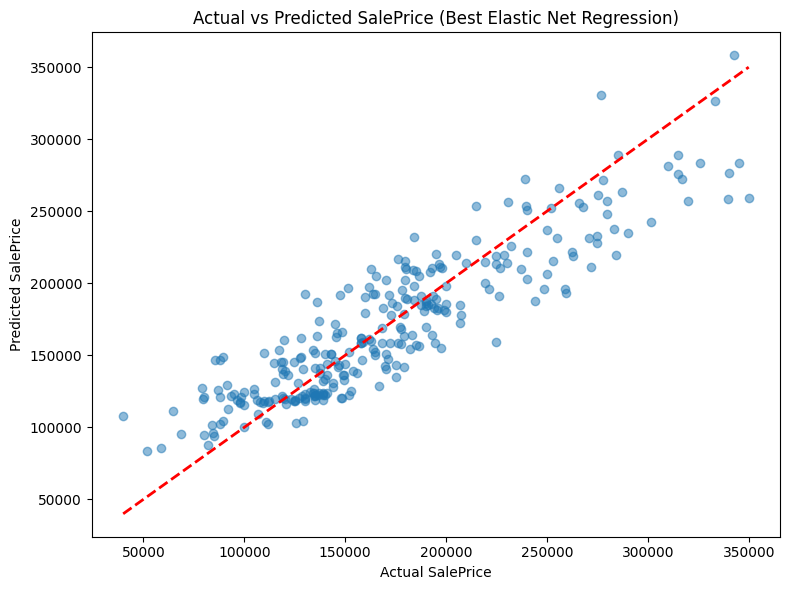

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df1 = pd.read_csv('train.csv')

# Specify the columns to keep from the dataset
columns_to_keep = ['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice','YrSold','OverallQual','GrLivArea']

# Create a new DataFrame with only the specified columns
new_df = df1[columns_to_keep]

# Create a new column 'TotalBath' by summing 'FullBath' and 'HalfBath'
new_df['TotalBath'] = new_df['FullBath'] + new_df['HalfBath']

# Drop the original 'FullBath' and 'HalfBath' columns
new_df = new_df.drop(columns=['FullBath', 'HalfBath'])

# Drop rows with missing values to avoid alignment issues
new_df = new_df.dropna()

# Function to detect outliers using MAD (Median Absolute Deviation)
def mad_based_outlier(points, threshold=3.5):
    if len(points.shape) == 1:
        points = points[:, None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=1)  # Change axis from -1 to 1
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > threshold

# Identify and remove outliers
outliers = mad_based_outlier(new_df[['LotArea', 'BedroomAbvGr', 'TotalBath', 'SalePrice','YrSold','OverallQual','GrLivArea']])
new_df = new_df[~outliers]

# Apply log transformation to SalePrice to reduce the impact of outliers
new_df['SalePrice'] = np.log1p(new_df['SalePrice'])

# Prepare the feature matrix (X) and the target vector (y)
X = new_df[['LotArea', 'BedroomAbvGr', 'TotalBath','YrSold','OverallQual','GrLivArea']]
y = new_df['SalePrice']

# Check if the lengths match
assert len(X) == len(y), "The feature matrix X and target vector y must have the same number of samples"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Initialize GridSearchCV to find the best parameters
elastic_net_grid = GridSearchCV(
    ElasticNet(max_iter=100000),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
elastic_net_grid.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = elastic_net_grid.best_params_
best_model = elastic_net_grid.best_estimator_

print("Best Parameters:", best_params)

# Predict the target values for the testing set using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Calculate the R² score and other metrics for the best Elastic Net model
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# Print the performance metrics for the best Elastic Net model
print(f'Best Elastic Net Regression:')
print(f'R² score (Best Elastic Net): {r2_best:.4f}')
print(f'Mean Absolute Error (MAE) (Best Elastic Net): {mae_best:.4f}')
print(f'Mean Squared Error (MSE) (Best Elastic Net): {mse_best:.4f}')

# Plot actual vs predicted values for the best Elastic Net Regression
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_best), alpha=0.5)
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Best Elastic Net Regression)")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Lasso): {'alpha': 0.001}
Best Lasso Regression:
R² score (Best Lasso): 0.7661
Mean Absolute Error (MAE) (Best Lasso): 0.1352
Mean Squared Error (MSE) (Best Lasso): 0.0317


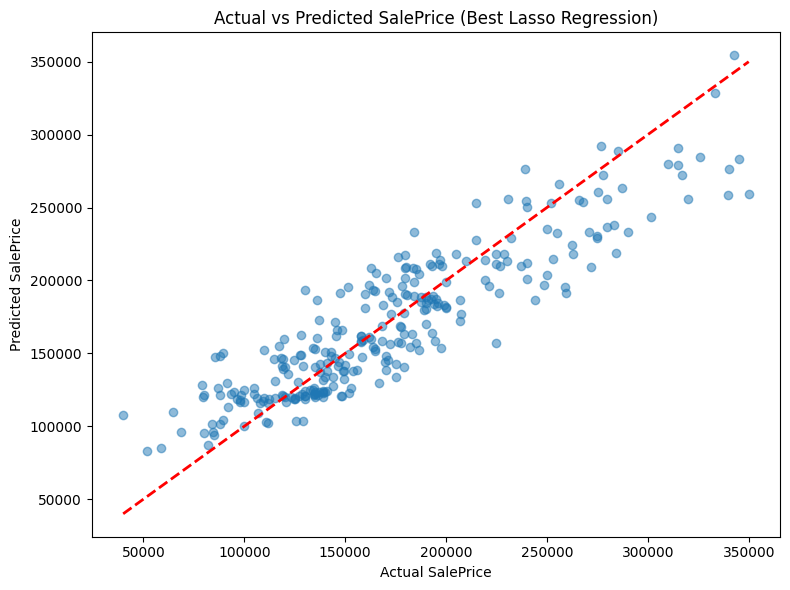

In [58]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Initialize GridSearchCV for Lasso
lasso_grid = GridSearchCV(
    Lasso(max_iter=100000),
    param_grid=param_grid_lasso,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV for Lasso
lasso_grid.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator for Lasso
best_params_lasso = lasso_grid.best_params_
best_model_lasso = lasso_grid.best_estimator_

print("Best Parameters (Lasso):", best_params_lasso)

# Predict the target values for the testing set using the best Lasso model
y_pred_best_lasso = best_model_lasso.predict(X_test_scaled)

# Calculate the R² score and other metrics for the best Lasso model
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)

# Print the performance metrics for the best Lasso model
print(f'Best Lasso Regression:')
print(f'R² score (Best Lasso): {r2_best_lasso:.4f}')
print(f'Mean Absolute Error (MAE) (Best Lasso): {mae_best_lasso:.4f}')
print(f'Mean Squared Error (MSE) (Best Lasso): {mse_best_lasso:.4f}')

# Plot actual vs predicted values for the best Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_best_lasso), alpha=0.5)
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Best Lasso Regression)")
plt.tight_layout()
plt.show()


In [59]:
# Compare performance metrics between Elastic Net and Lasso
print("Comparison of Regression Models:")
print(f'R² score (Best Elastic Net): {r2_best:.4f}')
print(f'Mean Absolute Error (MAE) (Best Elastic Net): {mae_best:.4f}')
print(f'Mean Squared Error (MSE) (Best Elastic Net): {mse_best:.4f}\n')

print(f'R² score (Best Lasso): {r2_best_lasso:.4f}')
print(f'Mean Absolute Error (MAE) (Best Lasso): {mae_best_lasso:.4f}')
print(f'Mean Squared Error (MSE) (Best Lasso): {mse_best_lasso:.4f}\n')


Comparison of Regression Models:
R² score (Best Elastic Net): 0.7685
Mean Absolute Error (MAE) (Best Elastic Net): 0.1349
Mean Squared Error (MSE) (Best Elastic Net): 0.0313

R² score (Best Lasso): 0.7661
Mean Absolute Error (MAE) (Best Lasso): 0.1352
Mean Squared Error (MSE) (Best Lasso): 0.0317

